In [4]:
try:
# %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

In [6]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)

def create_pairs_on_set(images, labels):
  digit_indices = [np.where(labels == i)[0] for i in range(10)]
  pairs, y = create_pairs(images, digit_indices)
  y = y.astype('float32')
  return pairs, y

def show_image(image):
  plt.figure()
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [7]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# prepare train and test sets
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize values
train_images = train_images / 255.0
test_images = test_images / 255.0

# create pairs on train and test sets
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

In [8]:
train_images[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

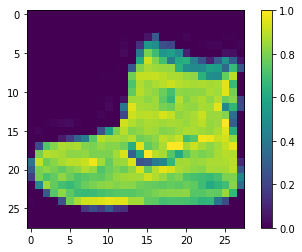

In [9]:
show_image(train_images[0,:,:])



In [10]:
np.where(test_labels==1)[0]

array([   2,    3,    5,   15,   24,   41,   47,   64,   65,   76,   80,
         94,   97,  128,  131,  133,  137,  140,  144,  146,  152,  173,
        175,  179,  190,  192,  199,  200,  211,  214,  216,  237,  270,
        281,  296,  310,  317,  334,  343,  345,  350,  360,  386,  398,
        409,  417,  436,  438,  447,  453,  487,  496,  504,  513,  517,
        519,  543,  545,  551,  553,  554,  555,  590,  591,  599,  604,
        645,  660,  662,  663,  701,  710,  718,  728,  733,  742,  743,
        759,  777,  782,  787,  790,  791,  792,  808,  825,  835,  838,
        843,  849,  854,  857,  861,  863,  864,  867,  873,  874,  886,
        897,  914,  941,  943,  950,  974, 1012, 1031, 1035, 1062, 1063,
       1070, 1073, 1082, 1083, 1086, 1091, 1109, 1117, 1118, 1182, 1183,
       1193, 1201, 1202, 1208, 1219, 1221, 1242, 1271, 1275, 1302, 1308,
       1319, 1345, 1348, 1351, 1381, 1392, 1397, 1402, 1416, 1424, 1429,
       1433, 1434, 1465, 1474, 1482, 1485, 1499, 15

In [11]:
test_labels[9591]

1

In [12]:
a = np.arange(10)
type(np.where(a == 5))

tuple

In [13]:
digit_indices = [np.where(test_labels == i)[0] for i in range(10)]


In [14]:
zzz = np.asarray(digit_indices)


In [15]:
type(zzz)

numpy.ndarray

In [16]:
mmm = min([len(ggg) for ggg in zzz])
mmm

1000

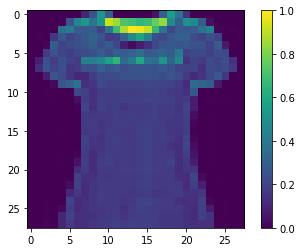

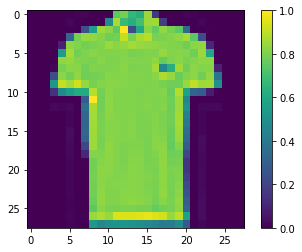

1.0


In [17]:
this_pair = 8
show_image(ts_pairs[this_pair][0])
show_image(ts_pairs[this_pair][1])

print(ts_y[this_pair])




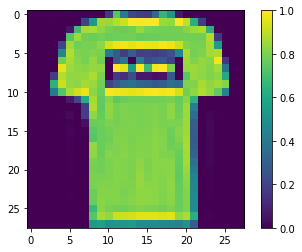

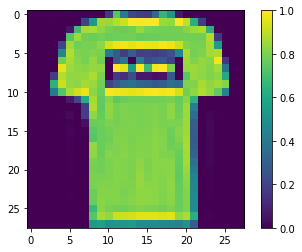

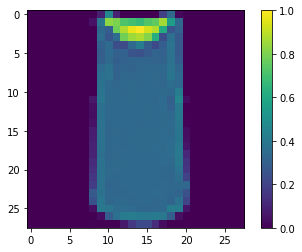

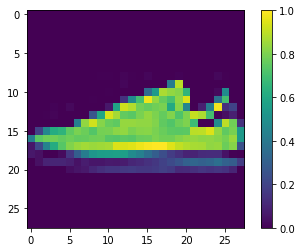

In [18]:
show_image(tr_pairs[:,0][0])
show_image(tr_pairs[:,0][1])

show_image(tr_pairs[:,1][0])
show_image(tr_pairs[:,1][1])



In [19]:
def initialize_base_network():
    input = Input(shape=(28,28,), name ="base_input")
    x = Flatten(name="flatten_input")(input)
    x = Dense(128, activation='relu',name="first_base_dense")(x)
    x = Dropout(0.1, name="first_dropout")(x)
    x = Dense(128, activation='relu', name="second_base_dense")(x)
    x = Dropout(0.1, name="second_dropout")(x)
    x = Dense(128, activation='relu', name="third_base_dense")(x)
    return Model(inputs=input, outputs=x)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

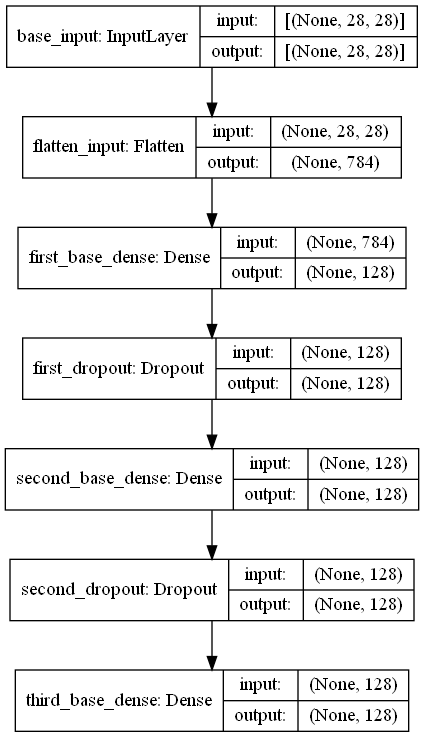

In [20]:
base_network = initialize_base_network()
plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='base-model.png')

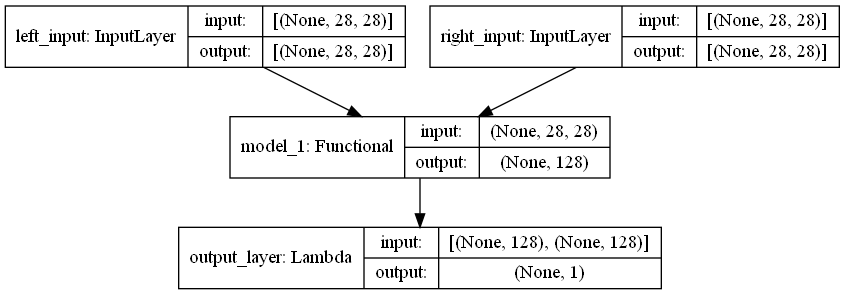

In [21]:
# create the left input and point to the base network
input_a = Input(shape=(28,28,), name="left_input")
vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(28,28,), name="right_input")
vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], output)

# plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [22]:
def contrastive_loss_with_margin(margin):
  def contrastive_loss(y_true, y_pred):
      '''Contrastive loss from Hadsell-et-al.'06
      http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
      '''
      square_pred = K.square(y_pred)
      margin_square = K.square(K.maximum(margin - y_pred, 0))
      return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
  return contrastive_loss

In [23]:
rms = RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = model.fit([tr_pairs[:,0], tr_pairs[:,1]], tr_y, epochs=20, batch_size=128, validation_data=([ts_pairs[:,0], ts_pairs[:,1]], ts_y))



Epoch 1/20
938/938 [==============================] - 59s 57ms/step - loss: 0.1485 - val_loss: 0.0869
Epoch 2/20
938/938 [==============================] - 14s 15ms/step - loss: 0.0829 - val_loss: 0.0746
Epoch 3/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0733 - val_loss: 0.0686
Epoch 4/20
938/938 [==============================] - 11s 11ms/step - loss: 0.0657 - val_loss: 0.0657
Epoch 5/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0627 - val_loss: 0.0668
Epoch 6/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0604 - val_loss: 0.0629
Epoch 7/20
938/938 [==============================] - 21s 22ms/step - loss: 0.0584 - val_loss: 0.0650
Epoch 8/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0577 - val_loss: 0.0644
Epoch 9/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0556 - val_loss: 0.0665
Epoch 10/20
938/938 [==============================] - 14s 15ms/step - loss: 0.055

In [24]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)



In [25]:
loss = model.evaluate(x=[ts_pairs[:,0],ts_pairs[:,1]], y=ts_y)

y_pred_train = model.predict([tr_pairs[:,0], tr_pairs[:,1]])
train_accuracy = compute_accuracy(tr_y, y_pred_train)

y_pred_test = model.predict([ts_pairs[:,0], ts_pairs[:,1]])
test_accuracy = compute_accuracy(ts_y, y_pred_test)

print("Loss = {}, Train Accuracy = {} Test Accuracy = {}".format(loss, train_accuracy, test_accuracy))



625/625 [==============================] - 5s 3ms/step - loss: 0.0612
Loss = 0.06123993173241615, Train Accuracy = 0.9402067011168528 Test Accuracy = 0.9161161161161161


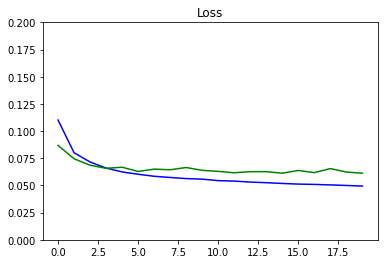

In [28]:
def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.set_xlim
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


plot_metrics(metric_name='loss', title="Loss", ylim=0.2)


In [29]:
history.history['loss']



[0.1101519912481308,
 0.0800706222653389,
 0.07153507322072983,
 0.06599041819572449,
 0.06241005286574364,
 0.060291189700365067,
 0.05842547491192818,
 0.05732624605298042,
 0.056318409740924835,
 0.05579211935400963,
 0.05440998077392578,
 0.05400419607758522,
 0.053090956062078476,
 0.052526313811540604,
 0.0518229678273201,
 0.05123637989163399,
 0.050941865891218185,
 0.05047006160020828,
 0.04997514560818672,
 0.04941565543413162]

<AxesSubplot:>

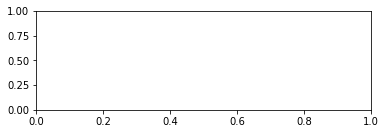

In [30]:
plt.plot([1, 2, 3])
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(211)

In [33]:
x1 = np.linspace(0.0, 5.0,20)
x1
x2 = np.linspace(0.0, 2.0)
x2

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

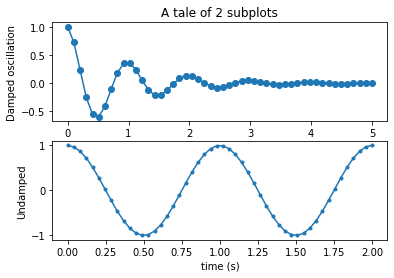

<Figure size 432x288 with 0 Axes>

In [36]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()
plt.savefig("Cosine.png")


In [37]:
def visualize_images():
# Matplotlib config
  plt.rc('image', cmap='gray_r')
  plt.rc('grid', linewidth=0)
  plt.rc('xtick', top=False, bottom=False, labelsize='large')
  plt.rc('ytick', left=False, right=False, labelsize='large')
  plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
  plt.rc('text', color='a8151a')
  plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts


# utility to display a row of digits with their predictions
def display_images(left, right, predictions, labels, title, n):
  plt.figure(figsize=(17,3))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])
  plt.grid(None)
  left = np.reshape(left, [n, 28, 28])
  left = np.swapaxes(left, 0, 1)
  left = np.reshape(left, [28, 28*n])
  plt.imshow(left)
  plt.figure(figsize=(17,3))
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], predictions)
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
      if predictions[i] > 0.5: t.set_color('red') # bad predictions in red
  plt.grid(None)
  right = np.reshape(right, [n, 28, 28])
  right = np.swapaxes(right, 0, 1)
  right = np.reshape(right, [28, 28*n])
  plt.imshow(right)




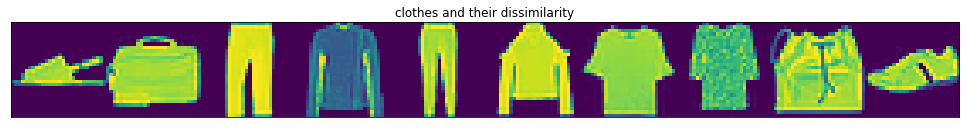

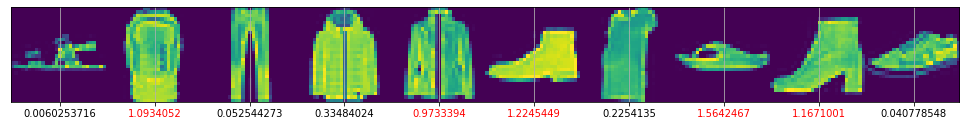

In [38]:
y_pred_train = np.squeeze(y_pred_train)
indexes = np.random.choice(len(y_pred_train), size=10)
display_images(tr_pairs[:, 0][indexes], tr_pairs[:, 1][indexes], y_pred_train[indexes], tr_y[indexes], "clothes and their dissimilarity", 10)

